In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [2]:
code_cars = pd.read_csv("data/new_cars_israel.csv", sep="|", quoting=1, encoding= "windows-1255")

In [3]:
code_cars['date'] = pd.to_datetime(code_cars['sgira_month'], format='%Y%m')

In [4]:
cars_monthly_aggregation = code_cars.groupby('date')['car_num'].sum().reset_index()

In [5]:
def split_half_month(row):
    date = row['date']
    car_num = row['car_num']
    
    # First half: 1st of the month with half the car_num
    first_half = pd.Series({'date': date, 'car_num': car_num / 2})
    
    # Second half: 16th of the month with the full car_num
    second_half = pd.Series({'date': date.replace(day=16), 'car_num': car_num})
    
    return pd.DataFrame([first_half, second_half])

In [6]:
cars_transformed = pd.concat(cars_monthly_aggregation.apply(split_half_month, axis=1).values, ignore_index=True)

In [8]:
cars_transformed.to_csv("data/cars_transformed.csv", index = False)

In [60]:
def seasonal_analysis(df, duration):
    decomposition = seasonal_decompose(df["car_num"], period = duration, model='additive')
        
    plt.figure(figsize=(15, 10))
    plt.subplot(411)
    plt.plot(df["date"], df["car_num"])
    plt.title('Cars Registration - Original Time Series')
        
    plt.subplot(412)
    plt.plot(df["date"], decomposition.trend)
    plt.title('Trend')
        
    plt.subplot(413)
    plt.plot(df["date"], decomposition.seasonal)
    plt.title('Seasonal')
        
    plt.subplot(414)
    plt.plot(df["date"], decomposition.resid)
    plt.title('Residual')
        
    plt.tight_layout()
    plt.savefig('visualizations/cars_registration_seasonal_decomposition.png')

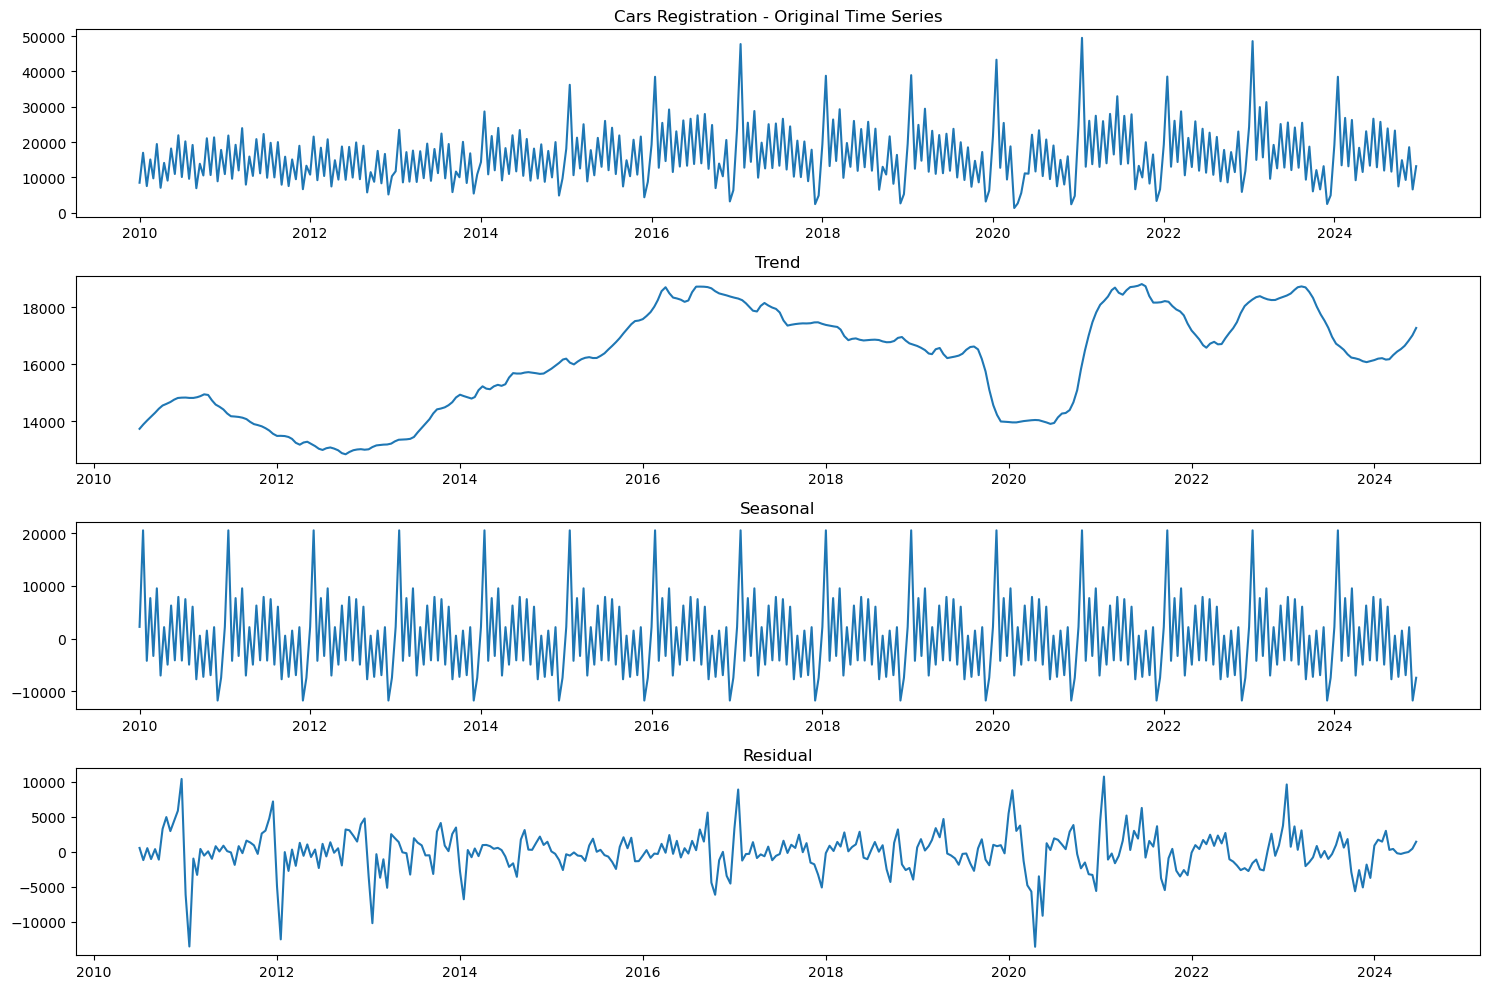

In [61]:
seasonal_analysis(cars_transformed, 24)

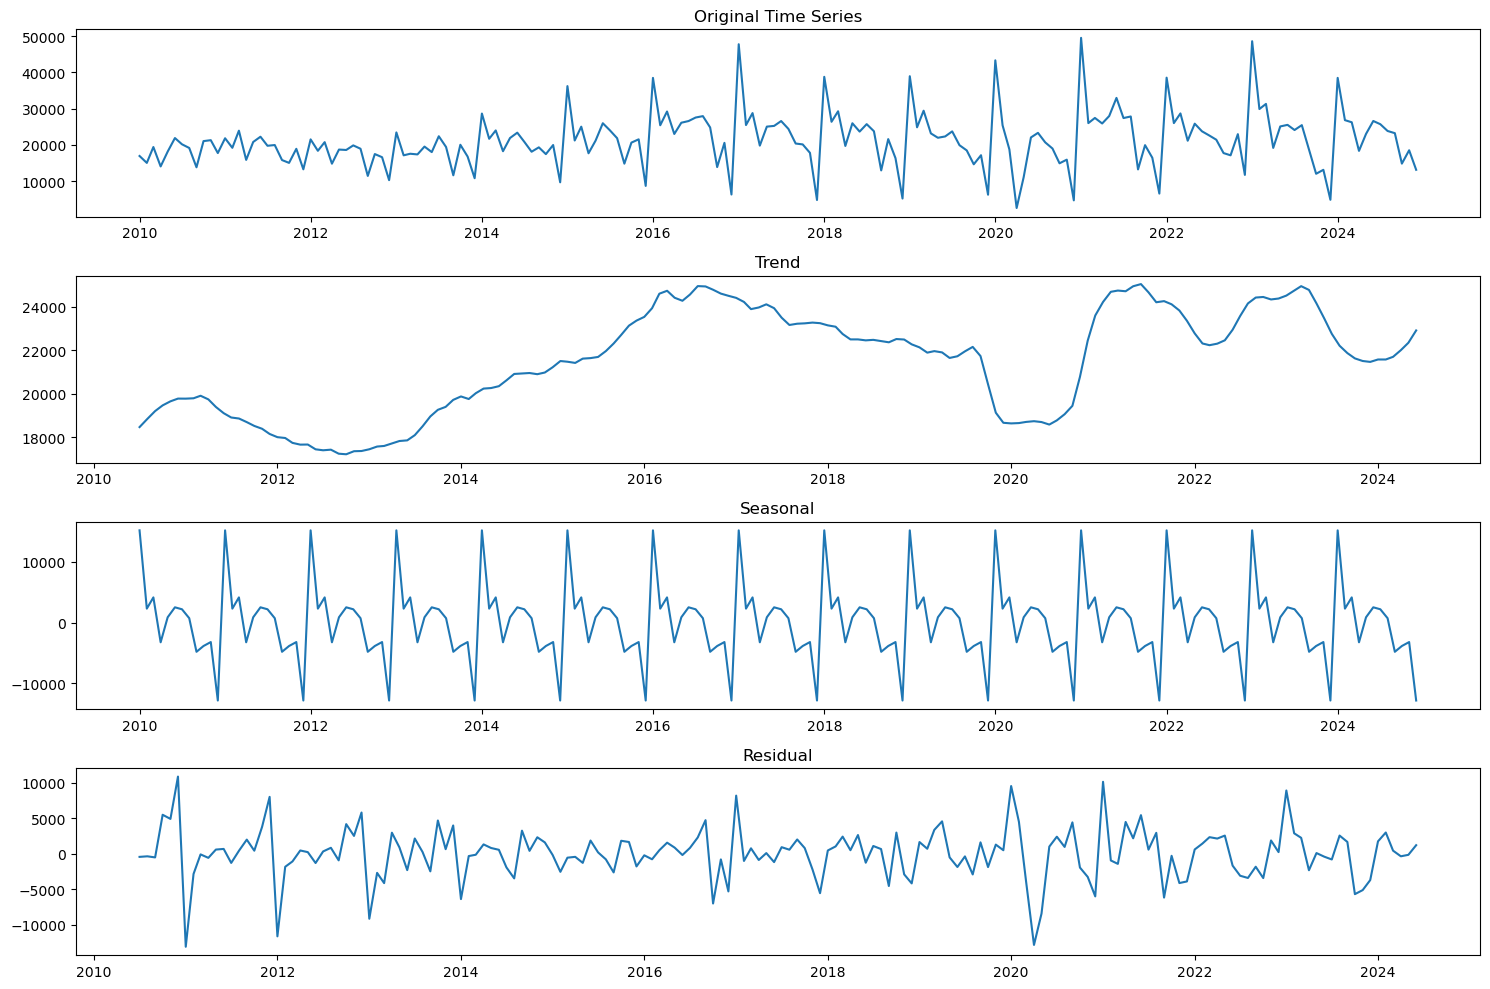

In [57]:
seasonal_analysis(cars_monthly_aggregation, 12)